**Мартынов Александр, гр. 3821Б1ПМоп3**

## **0. Описать задачу словами**

    Решается задача регрессии оценки риска при выдаче кредита (или одобрении долга) для клиента на основании его данных (Набор данных включает в себя разнообразные характеристики, такие как демографическая информация, кредитная история, статус занятости, уровень дохода, существующая задолженность и другие соответствующие финансовые показатели)

## **1. Прочитать данные**

In [1]:
# Подключение модулей
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
# Загрузка датасета
raw_data = pd.read_csv("./Data/Loan.csv")
raw_data = raw_data.drop(['ApplicationDate', 'LoanApproved'], axis=1) # Удаление даты, поскольку она не имеет смыслового влияния на задачу, но добавляет лишнюю сложность, и признака для бинарной классификации
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [3]:
numeric_feat = []
for feat in raw_data.keys():
  if ((raw_data.dtypes[feat] == 'float64' or raw_data.dtypes[feat] == 'int64') and feat != 'RiskScore'):
      numeric_feat.append(feat)

['Age',
 'AnnualIncome',
 'CreditScore',
 'Experience',
 'LoanAmount',
 'LoanDuration',
 'NumberOfDependents',
 'MonthlyDebtPayments',
 'CreditCardUtilizationRate',
 'NumberOfOpenCreditLines',
 'NumberOfCreditInquiries',
 'DebtToIncomeRatio',
 'BankruptcyHistory',
 'PreviousLoanDefaults',
 'PaymentHistory',
 'LengthOfCreditHistory',
 'SavingsAccountBalance',
 'CheckingAccountBalance',
 'TotalAssets',
 'TotalLiabilities',
 'MonthlyIncome',
 'UtilityBillsPaymentHistory',
 'JobTenure',
 'NetWorth',
 'BaseInterestRate',
 'InterestRate',
 'MonthlyLoanPayment',
 'TotalDebtToIncomeRatio']

## **2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.**

In [4]:
# Основные характеристики
raw_data.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,3.625241e+04,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,4.725151e+04,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,1.119675e+04,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,2.220300e+04,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,4.314650e+04,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,1.417302e+06,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,84.000000


In [5]:
# Матрица корреляции
corr_data = raw_data.corr(numeric_only=True)

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
Age,1.000000,0.144774,0.323243,0.982980,-0.007492,-0.006992,-0.000287,0.015685,-0.001394,-0.001069,...,-0.001197,0.144634,-0.005601,-0.000773,0.014061,-0.238995,-0.202702,-0.021380,-0.111800,-0.164304
AnnualIncome,0.144774,1.000000,0.104045,0.145999,-0.004116,0.002972,-0.001244,-0.001082,-0.007935,-0.008175,...,-0.002353,0.989911,-0.012351,-0.000610,-0.004358,-0.074549,-0.063832,-0.004304,-0.532033,-0.483289
CreditScore,0.323243,0.104045,1.000000,0.327664,-0.010834,-0.000762,-0.014453,0.011153,-0.009650,-0.008780,...,-0.006722,0.104796,-0.006838,0.008069,0.001951,-0.722619,-0.598844,-0.063932,-0.115363,-0.240198
Experience,0.982980,0.145999,0.327664,1.000000,-0.007921,-0.007924,0.000136,0.018629,-0.001751,-0.002143,...,-0.000449,0.145950,-0.006603,-0.000762,0.015049,-0.242871,-0.206252,-0.021691,-0.112825,-0.166496
LoanAmount,-0.007492,-0.004116,-0.010834,-0.007921,1.000000,-0.000436,-0.007005,0.021103,0.000806,0.000769,...,0.000502,-0.005407,-0.012107,0.005364,-0.003679,0.385663,0.322824,0.780828,0.457175,0.137981
LoanDuration,-0.006992,0.002972,-0.000762,-0.007924,-0.000436,1.000000,-0.001301,0.000068,-0.006160,0.001489,...,0.003668,0.003067,-0.010105,0.003635,-0.008779,0.579215,0.487994,-0.385495,-0.213984,0.054550
NumberOfDependents,-0.000287,-0.001244,-0.014453,0.000136,-0.007005,-0.001301,1.000000,-0.002396,0.011544,0.006033,...,0.009942,-0.000414,0.008735,0.010910,-0.008423,0.006977,0.006749,-0.001390,-0.000358,0.001686
MonthlyDebtPayments,0.015685,-0.001082,0.011153,0.018629,0.021103,0.000068,-0.002396,1.000000,0.005420,0.006280,...,-0.004211,-0.000356,0.001638,0.005863,0.004430,0.000010,0.003895,0.018021,0.219453,0.036938
CreditCardUtilizationRate,-0.001394,-0.007935,-0.009650,-0.001751,0.000806,-0.006160,0.011544,0.005420,1.000000,0.001491,...,-0.007778,-0.009381,0.013040,-0.006979,-0.003506,0.003668,0.001030,0.004366,0.010490,0.108758
NumberOfOpenCreditLines,-0.001069,-0.008175,-0.008780,-0.002143,0.000769,0.001489,0.006033,0.006280,0.001491,1.000000,...,-0.008406,-0.008050,-0.010497,0.007298,-0.002013,0.007457,0.008090,-0.005058,0.003471,0.007762


<Axes: >

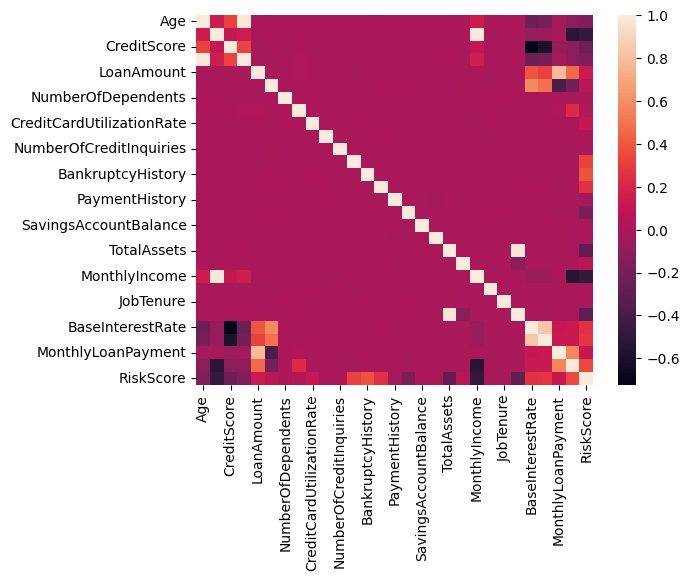

In [6]:
# Матрица корреляции в виде карты тепла
sns.heatmap(corr_data)

**Основные наблюдения:**

    1) Средний возраст - ~40 лет. Максимальный - 80, минимальный - 18.
    2) Средняя сумма кредита - ~25000. Максимальная - 184732, минимальная - 3674.
    3) Некоторые переменные имеют высокую корреляцию. Для некоторых это оправдывается логической связью (опыт в кредитах и возраст), для некоторых - тем, что они связаны напрямую (фактический доход и зарплата).

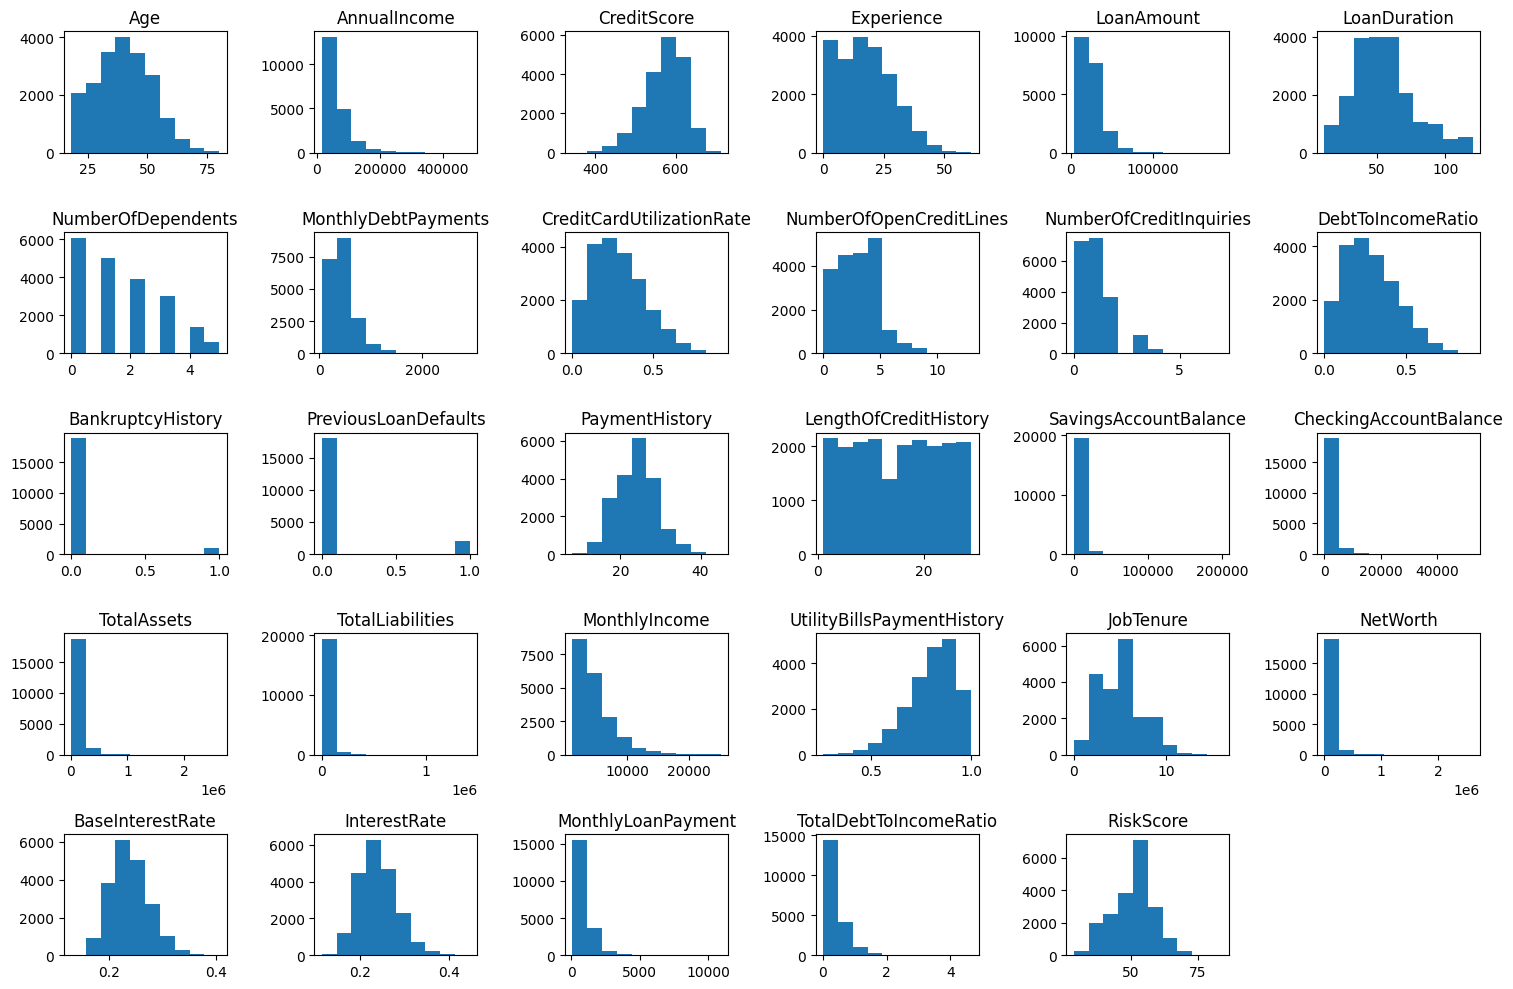

In [7]:
# Гистограммы численных столбцов
raw_data.hist(grid=False, layout=(5, 6), figsize=(15, 10))
plt.tight_layout()
plt.show()

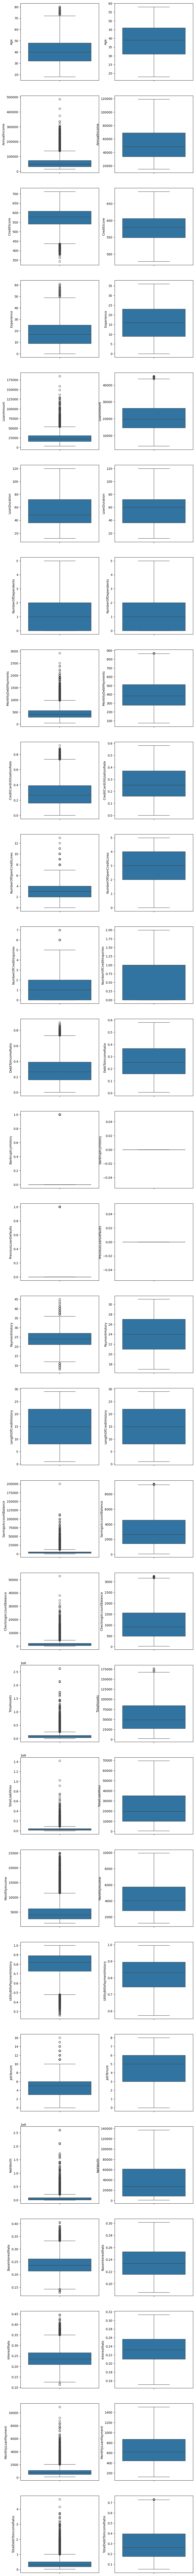

In [8]:
# Boxplot'ы некоторых исходных численных данных и их "обработанное представление" (Отбрасываем только там, где есть большие отклонения)
for_use_data = raw_data

f, axes = plt.subplots(28, 2)
f.set_figheight(150)
f.set_figwidth(10)

k = 0
for feat in numeric_feat:
    sns.boxplot(raw_data[feat], ax=axes[k, 0])
    k += 1

q = raw_data['Age'].quantile(0.95)
for_use_data = for_use_data[for_use_data['Age'] < q]
q = raw_data['AnnualIncome'].quantile(0.925)
for_use_data = for_use_data[for_use_data['AnnualIncome'] < q]
q = raw_data['CreditScore'].quantile(0.05)
for_use_data = for_use_data[for_use_data['CreditScore'] > q]
q = raw_data['Experience'].quantile(0.95)
for_use_data = for_use_data[for_use_data['Experience'] < q]
q = raw_data['LoanAmount'].quantile(0.925)
for_use_data = for_use_data[for_use_data['LoanAmount'] < q]
q = raw_data['MonthlyDebtPayments'].quantile(0.94)
for_use_data = for_use_data[for_use_data['MonthlyDebtPayments'] < q]
q = raw_data['CreditCardUtilizationRate'].quantile(0.95)
for_use_data = for_use_data[for_use_data['CreditCardUtilizationRate'] < q]
q = raw_data['NumberOfOpenCreditLines'].quantile(0.95)
for_use_data = for_use_data[for_use_data['NumberOfOpenCreditLines'] < q]
q = raw_data['NumberOfCreditInquiries'].quantile(0.95)
for_use_data = for_use_data[for_use_data['NumberOfCreditInquiries'] < q]
q = raw_data['DebtToIncomeRatio'].quantile(0.95)
for_use_data = for_use_data[for_use_data['DebtToIncomeRatio'] < q]
q = raw_data['BankruptcyHistory'].quantile(0.95)
for_use_data = for_use_data[for_use_data['BankruptcyHistory'] < q]
q = raw_data['PreviousLoanDefaults'].quantile(0.95)
for_use_data = for_use_data[for_use_data['PreviousLoanDefaults'] < q]
q1 = raw_data['PaymentHistory'].quantile(0.95)
q2 = raw_data['PaymentHistory'].quantile(0.05)
for_use_data = for_use_data[(for_use_data['PaymentHistory'] < q1) & (for_use_data['PaymentHistory'] > q2)]
q = raw_data['SavingsAccountBalance'].quantile(0.875)
for_use_data = for_use_data[for_use_data['SavingsAccountBalance'] < q]
q = raw_data['CheckingAccountBalance'].quantile(0.865)
for_use_data = for_use_data[for_use_data['CheckingAccountBalance'] < q]
q = raw_data['TotalAssets'].quantile(0.865)
for_use_data = for_use_data[for_use_data['TotalAssets'] < q]
q = raw_data['TotalLiabilities'].quantile(0.875)
for_use_data = for_use_data[for_use_data['TotalLiabilities'] < q]
q = raw_data['UtilityBillsPaymentHistory'].quantile(0.05)
for_use_data = for_use_data[for_use_data['UtilityBillsPaymentHistory'] > q]
q = raw_data['JobTenure'].quantile(0.95)
for_use_data = for_use_data[for_use_data['JobTenure'] < q]
q = raw_data['NetWorth'].quantile(0.85)
for_use_data = for_use_data[for_use_data['NetWorth'] < q]
q1 = raw_data['BaseInterestRate'].quantile(0.95)
q2 = raw_data['BaseInterestRate'].quantile(0.05)
for_use_data = for_use_data[(for_use_data['BaseInterestRate'] < q1) & (for_use_data['BaseInterestRate'] > q2)]
q = raw_data['InterestRate'].quantile(0.95)
for_use_data = for_use_data[for_use_data['InterestRate'] < q]
q = raw_data['MonthlyLoanPayment'].quantile(0.875)
for_use_data = for_use_data[for_use_data['MonthlyLoanPayment'] < q]
q = raw_data['TotalDebtToIncomeRatio'].quantile(0.875)
for_use_data = for_use_data[for_use_data['TotalDebtToIncomeRatio'] < q]

k = 0
for feat in numeric_feat:
    sns.boxplot(for_use_data[feat], ax=axes[k, 1])
    k += 1

plt.show()

([<matplotlib.patches.Wedge at 0x25dff6f86a0>,
 [Text(-0.9819503485146669, 0.49575549724831525, 'Employed'),
  Text(0.8554840669579199, -0.691481750432459, 'Unemployed'),
  Text(1.075317067836573, -0.2317179397874816, 'Self-Employed')])

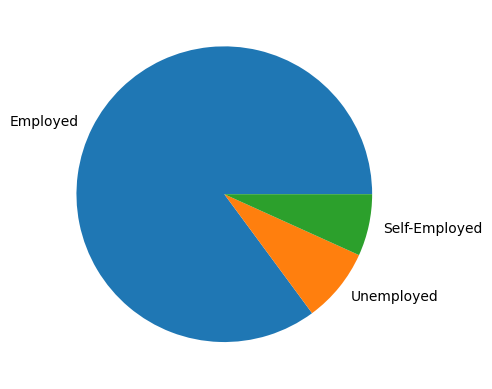

In [9]:
plt.pie(for_use_data['EmploymentStatus'].value_counts().values,labels = list(for_use_data['EmploymentStatus'].unique()))

([<matplotlib.patches.Wedge at 0x25dfbd993a0>,
 [Text(0.6370835862154978, 0.8967298947703264, 'High School'),
  Text(-1.0376205075631983, 0.3651625422798606, 'Associate'),
  Text(-0.36100441512846304, -1.039074497934463, 'Bachelor'),
  Text(0.8094533194419817, -0.7448391260160527, 'Doctorate'),
  Text(1.0906968508946566, -0.14275986637875226, 'Master')])

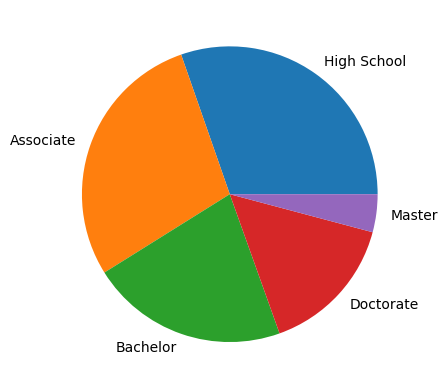

In [10]:
plt.pie(for_use_data['EducationLevel'].value_counts().values,labels = list(for_use_data['EducationLevel'].unique()))

([<matplotlib.patches.Wedge at 0x25dfbc668b0>,
 [Text(-0.007708695945594425, 1.0999729887623688, 'Single'),
  Text(-0.6208215582911896, -0.9080642007924877, 'Married'),
  Text(0.8087070779110086, -0.7456492889667622, 'Divorced'),
  Text(1.0895184659810433, -0.15149096437185428, 'Widowed')])

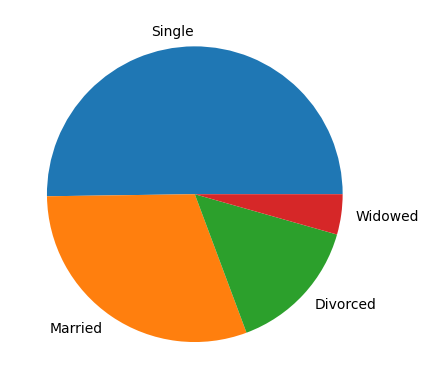

In [11]:
plt.pie(for_use_data['MaritalStatus'].value_counts().values,labels = list(for_use_data['MaritalStatus'].unique()))

([<matplotlib.patches.Wedge at 0x25dfbcb7bb0>,
 [Text(0.3390807115043986, 1.0464340739318798, 'Mortgage'),
  Text(-1.0460941104476082, -0.3401280818850853, 'Rent'),
  Text(0.36100426920069534, -1.039074548633962, 'Own'),
  Text(1.0530131958330817, -0.31806164402738035, 'Other')])

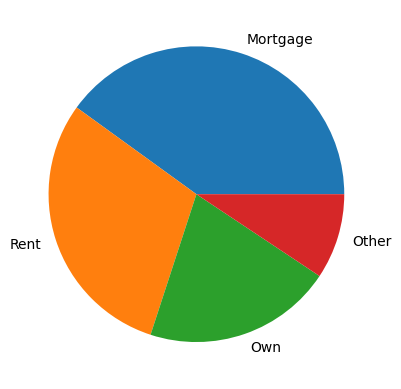

In [12]:
plt.pie(for_use_data['HomeOwnershipStatus'].value_counts().values,labels = list(for_use_data['HomeOwnershipStatus'].unique()))

([<matplotlib.patches.Wedge at 0x25dfbd0a490>,
 [Text(0.6513653474335169, 0.8864102798156246, 'Home'),
  Text(-0.9723431251454484, 0.5143431218383143, 'Auto'),
  Text(-0.6828826746381453, -0.8623637589086482, 'Debt Consolidation'),
  Text(0.4520334473752264, -1.0028288799461595, 'Education'),
  Text(1.0405118502926434, -0.3568404256815365, 'Other')])

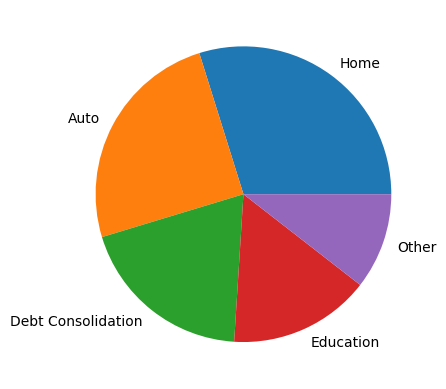

In [13]:
plt.pie(for_use_data['LoanPurpose'].value_counts().values,labels = list(for_use_data['LoanPurpose'].unique()))

## **3. Обработать пропущенные значения (или убедиться, что их нет)**

В данном датасете нет пропущенных значений в исходном представлении (как пустые поля). Вместо этого во многих строковыых признаках присутствуют значения "Other", заполняющие их места.

## **4. Обработать категориальные признаки**

In [14]:
for_use_data = pd.get_dummies(for_use_data, columns=['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'], drop_first=True)

## **5. Провести нормализацию**

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for_use_data[numeric_feat] = scaler.fit_transform(for_use_data[numeric_feat])

In [16]:
for_use_data = for_use_data.astype(float) # Для того, чтобы изавиться от boolean переменных

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
3,1.979662,0.635843,-0.789746,1.867153,2.042305,1.799215,-0.377676,2.057281,-0.001102,-0.491813,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23,-1.662539,0.402801,-1.847138,-1.687761,-0.533598,-1.492876,0.351645,-0.179274,0.886384,0.238229,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
29,-0.246128,0.278988,-0.009291,-0.223973,0.523121,1.250533,1.080967,0.304625,0.076609,0.238229,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32,0.057389,0.314122,-0.437282,0.298808,-1.301006,1.250533,-1.106997,-0.155669,-1.013453,-1.221856,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.967939,-0.598302,0.469053,1.030703,1.154772,-0.395513,-1.106997,0.906547,0.833950,-1.951899,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,0.765595,1.225981,-2.199602,0.717034,-0.480930,-0.944194,-0.377676,-0.521544,-0.177586,0.238229,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
19984,0.259733,-1.052539,-0.512810,0.403365,0.316299,0.153169,1.080967,1.000966,0.471924,-0.491813,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19992,1.170284,-0.766354,0.041061,1.135259,0.910913,-0.395513,1.080967,0.168897,1.001669,-0.491813,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19996,1.777317,-0.163444,-0.235875,1.762597,0.589737,-0.944194,2.539609,0.044972,1.483810,-0.491813,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## **6. Разбить данные на обучающую и тестовую выборки**

In [17]:
from sklearn.model_selection import train_test_split
from numpy import log

X = for_use_data.drop(['RiskScore'], axis=1)
y = [log(item) for item in for_use_data['RiskScore']] # Уменьшение разброса

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.25
)

## **7. Запустить классификатор (ререссию) ближайших соседей**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

model_linreg = LinearRegression().fit(X_train, y_train)

y_pred_train_linreg = model_linreg.predict(X_train)
y_pred_test_linreg = model_linreg.predict(X_test)

## **8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей)**

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
print("Среднеквадратичная ошибка для предсказания оценки риска при выдаче кредита (линейная регрессия, обучающая выборка):")
print(mean_squared_error(y_train, y_pred_train_linreg))

Среднеквадратичная ошибка для предсказания оценки риска при выдаче кредита (линейная регрессия, обучающая выборка):
0.0045824403463293395


In [21]:
print("Среднеквадратичная ошибка для предсказания оценки риска при выдаче кредита (линейная регрессия, тестовая выборка):")
print(mean_squared_error(y_test, y_pred_test_linreg))

Среднеквадратичная ошибка для предсказания оценки риска при выдаче кредита (линейная регрессия, тестовая выборка):
0.0049335026153203496


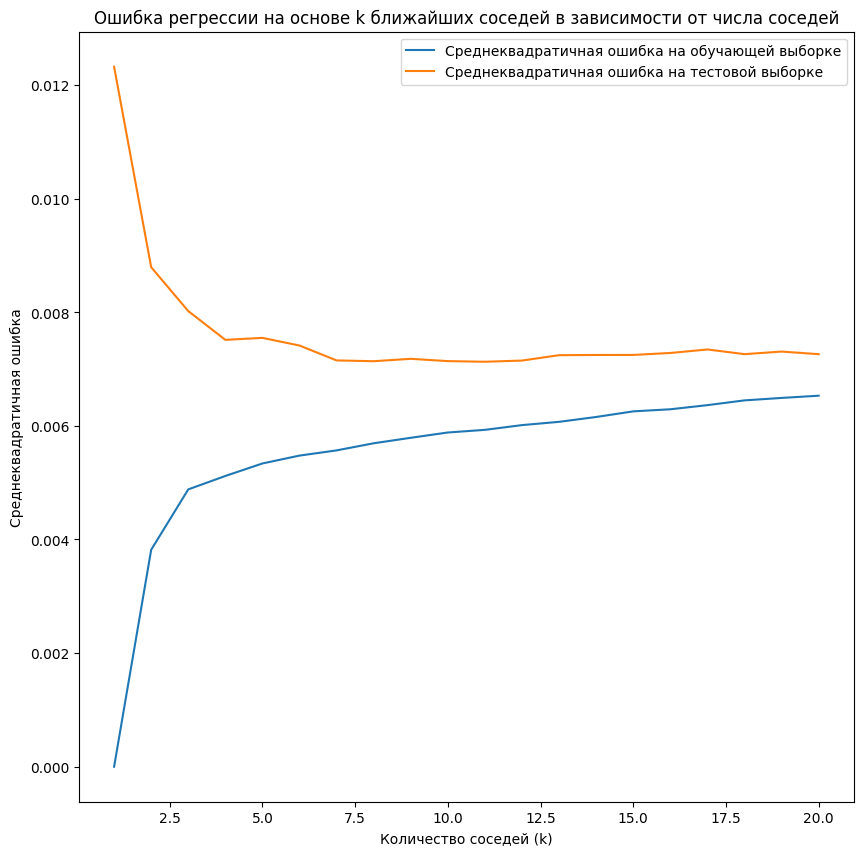

Оптимальное количество соседей: 11
Среднеквадратичная ошибка при оптимальном количестве соседей: 0.007127244904620224


In [22]:
train_err = []
test_err = []
neigh_range = range(1, 21)

for k in neigh_range:
    model_kneigh = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)

    train_err.append(mean_squared_error(y_train, model_kneigh.predict(X_train)))
    test_err.append(mean_squared_error(y_test, model_kneigh.predict(X_test)))

plt.figure(figsize=(10, 10))
plt.plot(neigh_range, train_err, label="Среднеквадратичная ошибка на обучающей выборке")
plt.plot(neigh_range, test_err, label="Среднеквадратичная ошибка на тестовой выборке")
plt.xlabel("Количество соседей (k)")
plt.ylabel("Среднеквадратичная ошибка")
plt.legend()
plt.title("Ошибка регрессии на основе k ближайших соседей в зависимости от числа соседей")
plt.show()

optimal_k = neigh_range[test_err.index(min(test_err))]
print("Оптимальное количество соседей:", optimal_k)
print("Среднеквадратичная ошибка при оптимальном количестве соседей:", min(test_err))

## **12. Сделать общие выводы**

    1) Исходные данные имели большой разброс в столбце оценки риска при выдаче кредита. Используя логарифмирование, удалось достичь меньшего разброса, что положительно сказывается на результате обучения модели.
    2) Категориальные признаки были сведены к столбцам с бинарнми значениями, таким образом было удалено использоание строчнх значений.